In [85]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt


In [86]:
pd.set_option('display.max_columns', None)
%matplotlib inline

In [13]:
def convert_dtype(x):
    if not x:
        return ''
    try:
        return str(x)
    except:
        return ''
def convert_dtypea(x):
    if not x:
        return ''
    try:
        return int(x)
    except:
        return ''
    
smile = pd.read_csv('../data/Smileon.2021.10.17.csv', skiprows=2, header=0, encoding='latin-1', converters={
     'LinkedToCallReportNum':convert_dtype,'ThirdPartyStateProvince':convert_dtype, 'FeedbackFromPhoneWorkerName':convert_dtype,
'SMILE ON 60+ Demographic Information - # of People in Household':convert_dtypea, 'Birth Year':convert_dtypea, 'SMILE ON 60+ Oral Care Encounter - 2393 - Quantity':convert_dtypea,
'SMILE ON 60+ Oral Care Encounter - 2950 - Quantity':convert_dtypea, 'SMILE ON 60+ Oral Care Encounter - 4342 - Quantity':convert_dtypea,
'SMILE ON 60+ Oral Care Encounter - 7140 - Quantity':convert_dtypea, 'SMILE ON 60+ Oral Care Encounter - 7320 - Quantity':convert_dtypea,
'SMILE ON 60+ Oral Care Encounter - Lab Assist narrative':convert_dtype, 'SMILE ON 60+ Case Management Information - What is the outcome for the client?':convert_dtype,
'SMILE ON 60+ Case Management Information - Dental Clinic':convert_dtype})

C:\Users\RMAUR\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (36,59) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [70]:
df = smile[['CallReportNum','CallDateAndTimeStart','CallDateAndTimeEnd','CallerNum','CityName','CountyName',
                  'StateProvince','PostalCode','SMILE ON 60+ Demographic Information - # of People in Household','Birth Year',
                  'SMILE ON 60+ Oral Care Encounter - 1351 - Quantity','SMILE ON 60+ Oral Care Encounter - 1354 - Quantity','SMILE ON 60+ Oral Care Encounter - 2140 - Quantity',
                  'SMILE ON 60+ Oral Care Encounter - 2150 - Quantity','SMILE ON 60+ Oral Care Encounter - 2160 - Quantity','SMILE ON 60+ Oral Care Encounter - 2161 - Quantity',
                  'SMILE ON 60+ Oral Care Encounter - 220 - Quantity','SMILE ON 60+ Oral Care Encounter - 230 - Quantity','SMILE ON 60+ Oral Care Encounter - 2330 - Quantity',
                  'SMILE ON 60+ Oral Care Encounter - 2331 - Quantity','SMILE ON 60+ Oral Care Encounter - 2332 - Quantity','SMILE ON 60+ Oral Care Encounter - 2335 - Quantity',
                  'SMILE ON 60+ Oral Care Encounter - 2390 - Quantity','SMILE ON 60+ Oral Care Encounter - 2391 - Quantity','SMILE ON 60+ Oral Care Encounter - 2392 - Quantity',
                  'SMILE ON 60+ Oral Care Encounter - 2393 - Quantity','SMILE ON 60+ Oral Care Encounter - 2394 - Quantity','SMILE ON 60+ Oral Care Encounter - 2915 - Quantity',
                  'SMILE ON 60+ Oral Care Encounter - 2920 - Quantity','SMILE ON 60+ Oral Care Encounter - 2933 - Quantity','SMILE ON 60+ Oral Care Encounter - 2940 - Quantity',
                  'SMILE ON 60+ Oral Care Encounter - 2950 - Quantity','SMILE ON 60+ Oral Care Encounter - 2954 - Quantity','SMILE ON 60+ Oral Care Encounter - 2955 - Quantity',
                  'SMILE ON 60+ Oral Care Encounter - 2980 - Quantity','SMILE ON 60+ Oral Care Encounter - 3220 - Quantity','SMILE ON 60+ Oral Care Encounter - 4341 - Quantity',
                  'SMILE ON 60+ Oral Care Encounter - 4342 - Quantity','SMILE ON 60+ Oral Care Encounter - 4342 - Quantity','SMILE ON 60+ Oral Care Encounter - 6930 - Quantity',
                  'SMILE ON 60+ Oral Care Encounter - 6980 - Quantity','SMILE ON 60+ Oral Care Encounter - 7111 - Quantity','SMILE ON 60+ Oral Care Encounter - 7140 - Quantity',
                  'SMILE ON 60+ Oral Care Encounter - 7210 - Quantity','SMILE ON 60+ Oral Care Encounter - 7220 - Quantity','SMILE ON 60+ Oral Care Encounter - 7230 - Quantity',
                   'SMILE ON 60+ Oral Care Encounter - 7240 - Quantity','SMILE ON 60+ Oral Care Encounter - 7241 - Quantity','SMILE ON 60+ Oral Care Encounter - 7250 - Quantity',
                  'SMILE ON 60+ Oral Care Encounter - 7261 - Quantity','SMILE ON 60+ Oral Care Encounter - 7285 - Quantity','SMILE ON 60+ Oral Care Encounter - 7286 - Quantity',
                  'SMILE ON 60+ Oral Care Encounter - 7286 - Quantity','SMILE ON 60+ Oral Care Encounter - 7310 - Quantity','SMILE ON 60+ Oral Care Encounter - 7311 - Quantity',
                   'SMILE ON 60+ Oral Care Encounter - 7320 - Quantity','SMILE ON 60+ Oral Care Encounter - 7321 - Quantity','SMILE ON 60+ Oral Care Encounter - 7410 - Quantity',
                   'SMILE ON 60+ Oral Care Encounter - 7411 - Quantity','SMILE ON 60+ Oral Care Encounter - 7412 - Quantity','SMILE ON 60+ Oral Care Encounter - 7414 - Quantity',
                  'SMILE ON 60+ Oral Care Encounter - 7415 - Quantity','SMILE ON 60+ Oral Care Encounter - 7440 - Quantity','SMILE ON 60+ Oral Care Encounter - 7450 - Quantity',
                  'SMILE ON 60+ Oral Care Encounter - 7451 - Quantity','SMILE ON 60+ Oral Care Encounter - 7460 - Quantity','SMILE ON 60+ Oral Care Encounter - 7461 - Quantity',
                  'SMILE ON 60+ Oral Care Encounter - 7471 - Quantity','SMILE ON 60+ Oral Care Encounter - 7510 - Quantity','SMILE ON 60+ Oral Care Encounter - 7511 - Quantity',
                  'SMILE ON 60+ Oral Care Encounter - 7970 - Mandibular Quantity','SMILE ON 60+ Oral Care Encounter - 7971 - Quantity','SMILE ON 60+ Oral Care Encounter - 7972 - Quantity',
                  'SMILE ON 60+ Oral Care Encounter - 9110 - Quantity','SMILE ON 60+ Oral Care Encounter - 9951 - Quantity','SMILE ON 60+ Oral Care Encounter - Lab Assist narrative',
                   'SMILE ON 60+ Oral Care Encounter - No Code - Denture Step Mandibular Quantity','SMILE ON 60+ Oral Care Encounter - No Code - Denture Step Maxillary Quantity',
                   'SMILE ON 60+ Screening - Last Screening Date','SMILE ON 60+ Base-line Oral and Conditions Questions - What is the next step for client encounter?','SMILE ON 60+ Base-line Oral and Conditions Questions - What is the next step for clients encounter?',
                  'SMILE ON 60+ Case Management Information - What barriers have kept you from finding a consistent dental home? (Select all that apply)','SMILE ON 60+ Case Management Information - What is the outcome for the client?',
                  'SMILE ON 60+ Clinic Information - Is patient of record date if yes last seen?','SMILE ON 60+ Demographic Information - Gender','SMILE ON 60+ Demographic Information - Household Income Level',
                  'SMILE ON 60+ Demographic Information - How did you first hear about the SMILE ON 60+ program?','SMILE ON 60+ Demographic Information - Race/Ethnicity',
                  'SMILE ON 60+ Demographic Information - When is the last time you visited your dentist?','SMILE ON 60+ Oral Care Encounter - Is the treatment plan completed?','SMILE ON 60+ Oral Care Encounter - Was a treatment plan developed?',
                  'SMILE ON 60+ Oral Care Encounter - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)','SMILE ON 60+ Oral Care Encounter - What care was provided to the enrollee? (Select all that apply)',
                  'SMILE ON 60+ Presumptive Eligibility - What is the next step for clients encounter?','SMILE ON 60+ Screening - Experienced any problems related to mouth/teeth during past 12 months?',
                  'SMILE ON 60+ Screening - How often do you brush your teeth?','SMILE ON 60+ Treatment Plan - Is the treatment plan completed?','SMILE ON 60+ Treatment Plan - Was a treatment plan developed?']]

In [83]:
df.columns = [x.replace('- Mandibular Quantity', '') for x in df.columns]


In [84]:
df.head()

,CallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallerNum,CityName,CountyName,StateProvince,PostalCode,SMILE ON 60+ Demographic Information - # of People in Household,Birth Year,1351,1354,2140,2150,2160,2161,220,230,2330,2331,2332,2335,2390,2391,2392,2393,2394,2915,2920,2933,2940,2950,2954,2955,2980,3220,4341,4342,4342,6930,6980,7111,7140,7210,7220,7230,7240,7241,7250,7261,7285,7286,7286,7310,7311,7320,7321,7410,7411,7412,7414,7415,7440,7450,7451,7460,7461,7471,7510,7511,7970,7971,7972,9110,9951,Lab Assist narrative,No Code - Denture Step Mandibular Quantity,No Code - Denture Step Maxillary Quantity,SMILE ON 60+ Screening - Last Screening Date,SMILE ON 60+ Base-line Oral and Conditions Questions - What is the next step for client encounter?,SMILE ON 60+ Base-line Oral and Conditions Questions - What is the next step for clients encounter?,SMILE ON 60+ Case Management Information - What barriers have kept you from finding a consistent dental home? (Select all that apply),SMILE ON 60+ Case Management Information - What is the outcome for the client?,SMILE ON 60+ Clinic Information - Is patient of record date if yes last seen?,SMILE ON 60+ Demographic Information - Gender,SMILE ON 60+ Demographic Information - Household Income Level,SMILE ON 60+ Demographic Information - How did you first hear about the SMILE ON 60+ program?,SMILE ON 60+ Demographic Information - Race/Ethnicity,SMILE ON 60+ Demographic Information - When is the last time you visited your dentist?,Is the treatment plan completed?,Was a treatment plan developed?,"Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",What care was provided to the enrollee? (Select all that apply),SMILE ON 60+ Presumptive Eligibility - What is the next step for clients encounter?,SMILE ON 60+ Screening - Experienced any problems related to mouth/teeth during past 12 months?,SMILE ON 60+ Screening - How often do you brush your teeth?,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?
0,93115324,9/30/2021 16:56,9/30/2021 16:57,3638169,Smyrna,Rutherford,TN,37167.0,1,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,Referred to dental clinic,No insurance,,NaN,Female,$0 - $21 280,Other,African American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93115188,9/30/2021 16:53,9/30/2021 16:53,4431194,Nashville,Davidson,TN,37211.0,1,1959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,Referred to dental clinic,Dental cost; No insurance,,NaN,Female,$0 - $21 280,Dental Clinic Staff,Caucasian,More than 5 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93115081,9/30/2021 16:50,9/30/2021 16:51,2941341,Memphis,Shelby,TN,38104.0,1,1942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,10/8/2019,Referred to dental clinic,NaN,Dental cost; No insurance,,NaN,Male,$0 - $21 280,Dental Clinic Staff,Asian,Less than 12 months,NaN,NaN,NaN,274 - Bitewings - four films - 5; 1110 - Proph...,Continued with Navigation,NaN,NaN,No,Yes
3,93115032,9/30/2021 16:48,9/30/2021 16:49,3823933,Memphis,Shelby,TN,38109.0,1,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [97]:
codes = df.iloc[:,10:-23]

In [99]:
codes.head(5)

,1351,1354,2140,2150,2160,2161,220,230,2330,2331,2332,2335,2390,2391,2392,2393,2394,2915,2920,2933,2940,2950,2954,2955,2980,3220,4341,4342,4342,6930,6980,7111,7140,7210,7220,7230,7240,7241,7250,7261,7285,7286,7286,7310,7311,7320,7321,7410,7411,7412,7414,7415,7440,7450,7451,7460,7461,7471,7510,7511,7970,7971,7972,9110,9951
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
codes_table = codes.sum()
codes_table[0]

29.0

In [124]:
codes_table = pd.DataFrame(codes_table)

In [141]:
codes_chart

,codes,count
0,1351,29.0
1,1354,2892.0
2,2140,64.0
3,2150,110.0
4,2160,48.0
5,2161,10.0
6,220,0.0
7,230,3409.0
8,2330,1423.0
9,2331,1280.0


<AxesSubplot:ylabel='codes'>

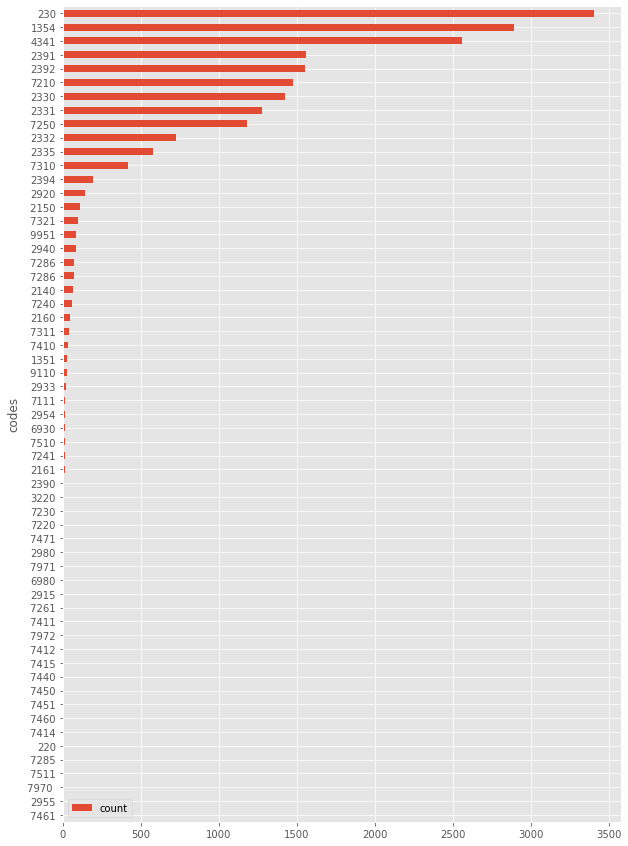

In [151]:
codes_chart = codes_chart.sort_values('count',ascending=True)
codes_chart.plot(kind='barh',x='codes',figsize=(10,15))